In [28]:

import numpy as np
import pandas as pd
import os

from sklearn import svm


import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1.2)
%matplotlib inline


In [29]:
recipes = pd.read_csv('CvM.csv')
print(recipes.head())


     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     56    25      2       7    6              2        0     0
1  Muffin     47    22     12       6    9              1        0     0
2  Muffin     47    26     18       6    4              2        1     0
3  Muffin     45    24     17      17    9              1        0     0
4  Muffin     50    23     12       6    8              1        1     0


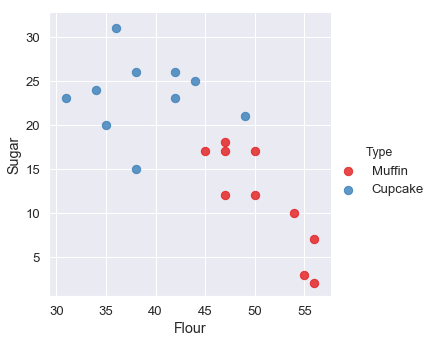

In [41]:
#plot our data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',
           palette= 'Set1',fit_reg=False,scatter_kws={"s":70});

In [54]:
#format or preprocess
type_label1 = np.where(recipes['Type']=='Muffin',0,1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [55]:
ingredients = recipes[['Flour','Sugar']].values
print(ingredients)

[[56  2]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [56  7]
 [54 10]
 [47 17]
 [50 17]
 [42 26]
 [38 15]
 [35 20]
 [42 23]
 [44 25]
 [49 21]
 [36 31]
 [34 24]
 [31 23]
 [38 26]]


In [58]:
model =svm.SVC(kernel='linear')
model.fit(ingredients,type_label1)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
w= model.coef_[0]
a =-w[0]/w[1]
xx = np.linspace(30,60)
yy=a*xx-(model.intercept_[0])/w[1]

b= model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=  a*xx+(b[1]-a*b[0])


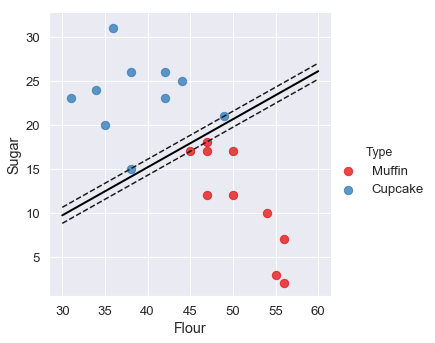

In [70]:
#plot our data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',
           palette= 'Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [75]:
#function to predict
def CVM(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')     
        
CVM(32,20)       

You're looking at a cupcake recipe!


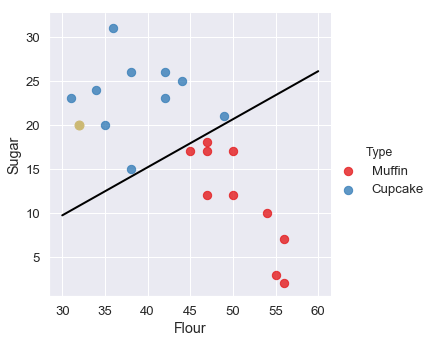

In [76]:
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',
           palette= 'Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(32,20,'yo',markersize='9')